In [12]:
#1.	Use the location coordinates to find the distance for each trip. Create a new column – ‘distance’ and store its value there. Use the following formula:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv('Dataset_Day3.csv')

data['Distance'] = np.sqrt((data['dropoff_latitude']-data['pickup_latitude'])**2 + (data['dropoff_longitude']-data['pickup_longitude'])**2)

data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,0.142223
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1,0.033101


In [13]:
#2.	Find all the ‘key’ values for which the attributes: fare_amount & passenger_count & distance are outliers. Remove all rows with outliers.

OutlierData = pd.DataFrame()
for col in ["fare_amount","passenger_count","Distance"]:

    z_score = (data[col]-data[col].mean())/data[col].std()

    OutlierData[col] = data[col][(z_score>3)|(z_score<-3)]

print(OutlierData)
data_OutlierFree = data.drop(OutlierData.index,axis=0)
data


        fare_amount  passenger_count  Distance
48            56.80              NaN       NaN
84            49.57              NaN       NaN
104           43.00              NaN       NaN
204           45.00              NaN       NaN
226           49.80              NaN       NaN
...             ...              ...       ...
199914        57.33              NaN       NaN
199972        45.00              NaN       NaN
199976        49.70              NaN       NaN
199977        43.50              NaN       NaN
199982        57.33              NaN       NaN

[5450 rows x 3 columns]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,0.142223
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1,0.033101


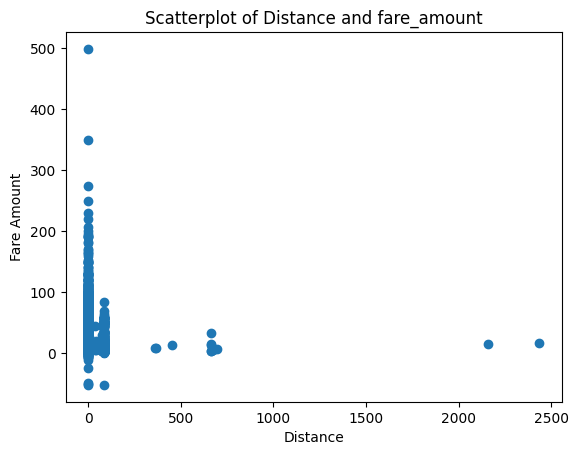

In [14]:
#3.	Show the scatterplot between distance & fare_amount. Is there any relationship that you can identify?

plt.scatter(data['Distance'],data['fare_amount'])
plt.title('Scatterplot of Distance and fare_amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show();